In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('IPL.csv')
df.head(2)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18


In [17]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   match_id             74 non-null     int64
 1   date                 74 non-null     str  
 2   venue                74 non-null     str  
 3   team1                74 non-null     str  
 4   team2                74 non-null     str  
 5   stage                74 non-null     str  
 6   toss_winner          74 non-null     str  
 7   toss_decision        74 non-null     str  
 8   first_ings_score     74 non-null     int64
 9   first_ings_wkts      74 non-null     int64
 10  second_ings_score    74 non-null     int64
 11  second_ings_wkts     74 non-null     int64
 12  match_winner         74 non-null     str  
 13  won_by               74 non-null     str  
 14  margin               74 non-null     int64
 15  player_of_the_match  74 non-null     str  
 16  top_scorer           74 non-null     st

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df['date'].info()

<class 'pandas.Series'>
RangeIndex: 74 entries, 0 to 73
Series name: date
Non-Null Count  Dtype         
--------------  -----         
74 non-null     datetime64[us]
dtypes: datetime64[us](1)
memory usage: 724.0 bytes


In [20]:
df.shape

(74, 20)

In [21]:
df.isna().sum().sum()

np.int64(0)

In [22]:
match_win = df['match_winner'].value_counts()
print(f"{match_win.idxmax()} - {match_win.max()} wins")

Gujarat - 12 wins


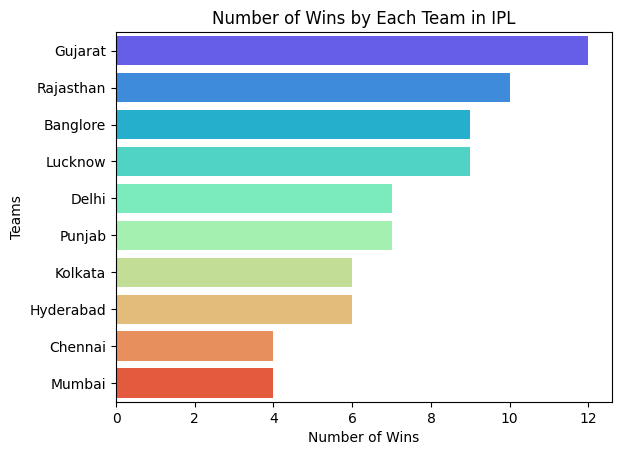

In [23]:
sns.barplot(y=match_win.index, x=match_win.values, palette='rainbow')
plt.xlabel('Number of Wins')
plt.ylabel('Teams')
plt.title('Number of Wins by Each Team in IPL')
plt.show()

In [24]:
toss = df['toss_decision'].value_counts()
toss

toss_decision
Field    59
Bat      15
Name: count, dtype: int64

Text(0, 0.5, 'Count')

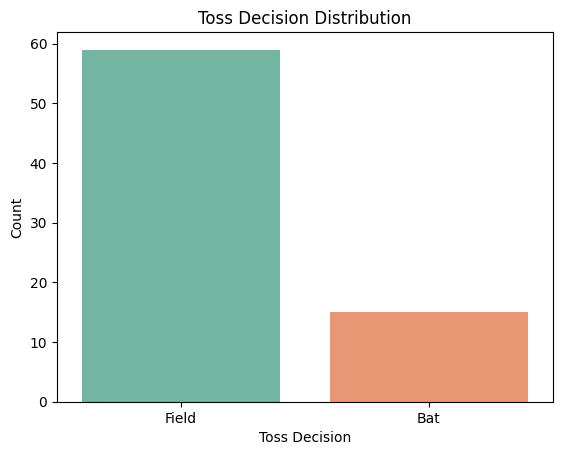

In [25]:
sns.countplot(x='toss_decision', data=df, palette='Set2')
plt.title('Toss Decision Distribution')
plt.xlabel('Toss Decision')
plt.ylabel('Count')


In [36]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count * 100) / df.shape[0]
percentage.round(2)

np.float64(48.65)

In [43]:
df['won_by'].value_counts()

won_by
Wickets    37
Runs       37
Name: count, dtype: int64

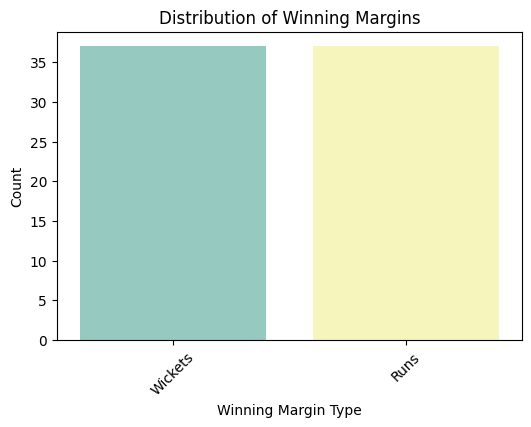

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='won_by', palette='Set3')
plt.title('Distribution of Winning Margins')
plt.xlabel('Winning Margin Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()